# Aplicação: cores PANTONE

## Leitura de arquivos _json_

In [1]:
import os, json

In [2]:
# diretório base
base = '../database/pantone-colors/'

for fi in os.listdir(base):
    n,e = os.path.splitext(fi)
    if e == '.json':        
        with open(os.path.join(base,fi), 'r') as f: 
            # define variáveis dinamicamente
            exec(f'{n} = {json.load(f)}')                       

In [3]:
# verifica se variáveis foram criadas
%who

base	 e	 f	 fi	 json	 n	 os	 pantone_coated	 pantone_metallic	 



### Desempacotar sequencia em variáveis separadas

In [4]:
# no. elementos da lista
len(pantone_coated)

1341

In [5]:
# cada elemento é um dict
pantone_coated[0:3],pantone_metallic[-4:-1]

([{'pantone': '100-c', 'hex': '#f6eb61'},
  {'pantone': '101-c', 'hex': '#f7ea48'},
  {'pantone': '102-c', 'hex': '#fce300'}],
 [{'pantone': '8962-c', 'hex': '#b37300'},
  {'pantone': '8963-c', 'hex': '#bf6d10'},
  {'pantone': '8964-c', 'hex': '#aa6526'}])

In [6]:
# desempacotamento apenas de valores
pname,hexcolor = pantone_coated[0].values()

- Atualizar dicts com códigos de cores rgb

In [7]:
# função para converter hex para rgb

def hex2rgb(hexcolor):
    h = hexcolor.lstrip('#')
    rgb = tuple(int(h[i:i+2],16) for i in (0,2,4))
    return rgb

In [8]:
# atualiza dict com rgb 

for c in range(len(pantone_coated)):
    d = pantone_coated[c]
    pname,hexcolor = d.values()
    rgb = hex2rgb(hexcolor)    
    pantone_coated[c].update({'rgb':rgb})
    
for c in range(len(pantone_metallic)):
    d = pantone_metallic[c]
    pname,hexcolor = d.values()
    rgb = hex2rgb(hexcolor)    
    pantone_metallic[c].update({'rgb':rgb})    

**Exercício:** Defina uma função `update_colors(clist)` que recebe um dict `clist` de cores Pantone e o atualiza para conter a chave `'rgb'`.

## Desempacotar elementos em iteráveis de comprimento arbitrário

Suponha que o dict estivesse organizado de tal forma que o nome e os códigos HEX e RGB de uma certa cor estivessem sequenciados em uma tuple ou list:

In [46]:
ex = pantone_coated[0]
ex = ex['pantone'],ex['hex'], ex['rgb']
ex

('100-c', '#f6eb61', (246, 235, 97))

O desempacotamento das cores poderia ser feito por meio de uma _expressão estrela_ (_star expression_):

In [193]:
# desempacota por star expression e ignora primeiro item
_,*pcolors = ex
pcolors

['#f6eb61', (246, 235, 97)]

Note que usamos 2 variáveis para desempacotar uma tuple de 3 elementos. Outros casos em que _star expressions_ são úteis envolvem dados que possuem mais de um valor atribuível a um mesmo registro (p.ex.: 1 pessoa com 2 números de telefone), ou quando se quer quebrar iteráveis em comprimentos arbitrários. Por exemplo:   

```{hint}
Use um _underscore_ (`_`) para representar uma variável que, devido ao desempacotamento, você considere "indesejada".
```

In [196]:
_,*m4,_ = [3,4,8,12,16,10]
m4 # múltiplos de 4

[4, 8, 12, 16]

In [195]:
_,_,_,*m5 = [4,8,12,5,10]
m5 # múltiplos de 5

[5, 10]

In [197]:
*m6,_,_ = [6,12,5,10]
m6 # múltiplos de 6

[6, 12]

In [51]:
# 2 star expressions não são permitidas
*m6,*m5 = [6,12,5,10]

SyntaxError: two starred expressions in assignment (<ipython-input-51-7df27395c22b>, line 1)

```{note}
Ao usar uma _star expression_, certifique-se que o número de variáveis usadas no desempacotamento é consistente com os seus objetivos.
```

## Localizar os maiores ou menores N itens em uma coleção

No espaço vetorial RGB, as cores variam do vetor (0,0,0), branco, ao vetor (255,255,255), preto. Em um cubo unitário, podemos trabalhar com valores "normalizados". Para isso, basta dividir todos os valores nas tuplas por 255, de modo que o maior vetor seja (1,1,1). 

Em linhas gerais, o espaço de cores RGB é uma região do espaço tridimensional limitada definida por: 

$$V = \{(r,g,b) \ : \ 0 \leq r,g,b \leq 1\}$$

Assim, vamos construir um dict com cores normalizadas para utilizarmos mais à frente.

In [218]:
# indexa cores
c_pc = {i:c['rgb'] for i,c in enumerate(pantone_coated)}

# normaliza
for i,v in c_pc.items():
    r,g,b = v   
    c_pc[i] = (r/255,g/255,b/255)

Suponhamos que nosso interesse seja saber quais são as _N_ maiores ou menores pigmentações de vermelho em uma fatia do dict `pantone_coated`. Vejamos duas formas de fazer isso:

- Usando `sorted`:

In [242]:
# pigmentações
r = [i[0] for i in c_pc.values()][1200:1211]

# 10 pigmentações
N = 10

# ordena 
r1 = sorted(r)

# ordena em modo reverso
r2 = sorted(r,reverse=True)

# menores
print(r1[:N],'\n')

# maiores
print(r2[:N])

[0.3058823529411765, 0.3843137254901961, 0.4392156862745098, 0.47843137254901963, 0.6392156862745098, 0.6666666666666666, 0.7176470588235294, 0.7725490196078432, 0.7764705882352941, 0.8274509803921568] 

[0.8392156862745098, 0.8274509803921568, 0.7764705882352941, 0.7725490196078432, 0.7176470588235294, 0.6666666666666666, 0.6392156862745098, 0.47843137254901963, 0.4392156862745098, 0.3843137254901961]


- Usando o módulo `heapq`

In [243]:
import heapq 

# N menores
r3 = heapq.nsmallest(N,r)
print(r3,'\n')

# N maiores
r4 = heapq.nlargest(N,r)
print(r4)

[0.3058823529411765, 0.3843137254901961, 0.4392156862745098, 0.47843137254901963, 0.6392156862745098, 0.6666666666666666, 0.7176470588235294, 0.7725490196078432, 0.7764705882352941, 0.8274509803921568] 

[0.8392156862745098, 0.8274509803921568, 0.7764705882352941, 0.7725490196078432, 0.7176470588235294, 0.6666666666666666, 0.6392156862745098, 0.47843137254901963, 0.4392156862745098, 0.3843137254901961]


Entretanto, é útil pensar em como buscar pelas tonalidades de cor mais claras ou mais escuras ordenando-as pelos valores das pigmentações individualmente usando `sorted` e _key functions_. 

A seguir, usamos permutações de $(r,g,b)$ para mostrar como podemos fazer múltiplas ordenações.

In [273]:
from operator import itemgetter

# ordena por R, depois G, então B
sorted_rgb = sorted(c_pc.values(),key=itemgetter(0,1,2),reverse=True)

# ordena por G, depois B, então R
sorted_gbr = sorted(c_pc.values(),key=itemgetter(1,2,0),reverse=True)

# ordena por B, depois R, então G
sorted_brg = sorted(c_pc.values(),key=itemgetter(2,0,1),reverse=True)

# ordena por R, depois B, então G
sorted_rbg = sorted(c_pc.values(),key=itemgetter(0,2,1))

# ordena por G, depois R, então B
sorted_grb = sorted(c_pc.values(),key=itemgetter(1,0,2))

# ordena por B, depois G, então R
sorted_bgr = sorted(c_pc.values(),key=itemgetter(2,1,0))


Agora, plotamos paletas com as _k_ primeiras cores dos dicts anteriores:

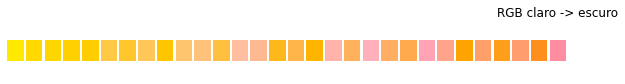

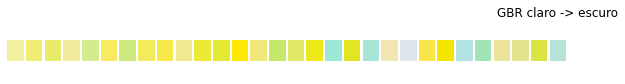

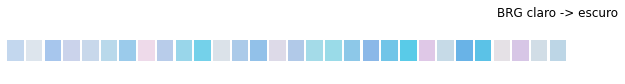

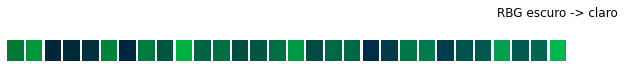

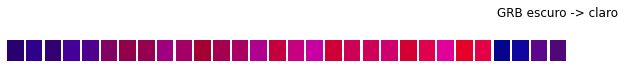

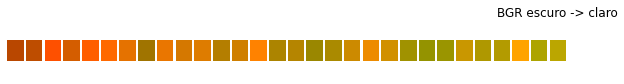

In [277]:
import matplotlib.pyplot as plt

def plotKColors(d,k,t):  
    '''
        Plota paleta simples de k primeiras cores 
        do dict d com título t.
    '''
    _, ax = plt.subplots(1,k,figsize=(10,1),facecolor=None)
    for i in range(k):                 
        ax[i].plot(0.5,0.5,'s',ms=20,c=d[i])
        ax[i].axis('off')        
    plt.title(t)
        
# k = 30        
plotKColors(sorted_rgb,30,'RGB claro -> escuro')        
plotKColors(sorted_gbr,30,'GBR claro -> escuro')
plotKColors(sorted_brg,30,'BRG claro -> escuro')
plotKColors(sorted_rbg,30,'RBG escuro -> claro')
plotKColors(sorted_grb,30,'GRB escuro -> claro')
plotKColors(sorted_bgr,30,'BGR escuro -> claro')